In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Dataset_nilai.csv


In [116]:
grades = pd.read_csv("../input/Dataset_nilai.csv",index_col=False)

In [117]:
grades.head()

,kelompok,id,kelas,Latihan_1,Tugas_1,Latihan_2,Tugas_2,Latihan_3,Tugas_3,Latihan_4,...,Tugas_8,Tugas_9,ttd_kpp,rata_rata,nilai_individu,nilai_akhir_laporan,utp_total,utp_esai,utp_koding,nilai_akhir
0,1.0,1.0,F,90,85,95.0,90.0,81,87,96,...,82.0,78.0,v,87.000,90.0,87.6,67.0,52.0,15.0,79.36
1,1.0,2.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,82.5,85.6,62.0,52.0,10.0,76.16
2,1.0,3.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,92.5,87.6,62.0,52.0,10.0,77.36
3,1.0,4.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,82.5,85.6,62.0,52.0,10.0,76.16
4,1.0,5.0,F,90,85,95.0,90.0,76,82,96,...,82.0,78.0,v,86.375,85.0,86.1,62.0,52.0,10.0,76.46


In [118]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 27 columns):
kelompok               209 non-null float64
id                     209 non-null float64
kelas                  209 non-null object
Latihan_1              243 non-null int64
Tugas_1                243 non-null int64
Latihan_2              243 non-null float64
Tugas_2                243 non-null float64
Latihan_3              243 non-null int64
Tugas_3                243 non-null int64
Latihan_4              243 non-null int64
Tugas_4                243 non-null float64
Latihan_5              243 non-null int64
Tugas_5                243 non-null int64
Tugas_6                243 non-null int64
Latihan_7              243 non-null int64
Tugas_7                243 non-null int64
Latihan_8              243 non-null float64
Tugas_8                243 non-null float64
Tugas_9                243 non-null float64
ttd_kpp                85 non-null object
rata_rata              86 non-null flo

In [119]:
grades.utp_total.describe()

count    241.000000
mean      72.391494
std       16.512829
min        0.000000
25%       64.400000
50%       75.000000
75%       82.200000
max      110.000000
Name: utp_total, dtype: float64

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


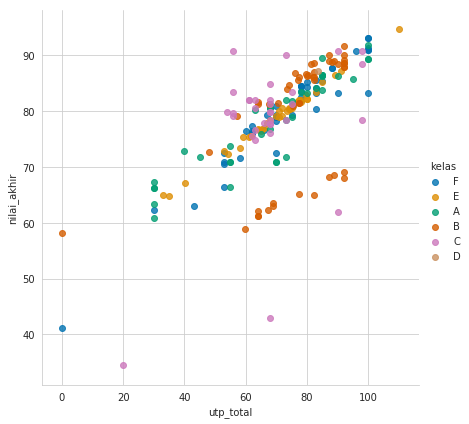

In [120]:
sns.set_style('whitegrid')
sns.lmplot('utp_total','nilai_akhir',data=grades, hue = 'kelas',
           palette='colorblind',size=6,aspect=1,fit_reg=False)

In [143]:
grades.kelas.fillna("D", inplace = True)

In [145]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

data_imputer = SimpleImputer()

data_copy = grades.loc[grades['kelas']=='D',:].copy()

x = data_copy.loc[:,['utp_total','nilai_akhir']]

imputed_data = data_imputer.fit_transform(x)

imputed_data

array([[83.5 , 87.28],
       [82.  , 85.33],
       [85.25, 85.73],
       [82.25, 85.2 ],
       [76.25, 78.61],
       [73.5 , 75.61],
       [87.  , 88.12],
       [79.38, 82.7 ],
       [79.5 , 86.33],
       [76.75, 85.56],
       [78.25, 73.83],
       [78.25, 85.83],
       [77.  , 82.08],
       [50.  , 52.16],
       [77.25, 93.68],
       [76.4 , 82.97],
       [75.58, 84.68],
       [75.58, 84.68],
       [76.65, 85.11],
       [72.28, 83.36],
       [74.1 , 83.08],
       [79.35, 85.68],
       [65.75, 66.49],
       [82.25, 86.34],
       [78.75, 83.6 ],
       [81.15, 96.74],
       [80.55, 91.5 ],
       [76.  , 94.41],
       [70.5 , 87.17],
       [74.15, 82.63],
       [87.2 , 87.85],
       [81.58, 85.6 ],
       [68.65, 66.18],
       [70.  , 79.72],
       [50.  , 55.72]])

In [146]:
kmeans = KMeans(3)

In [147]:
kmeans.fit(imputed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Result

In [148]:
identified_clusters = kmeans.fit_predict(imputed_data)

identified_clusters

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2], dtype=int32)

In [149]:
data_with_clusters = data_copy.copy()

data_with_clusters['Cluster'] = identified_clusters

data_with_clusters

,kelompok,id,kelas,Latihan_1,Tugas_1,Latihan_2,Tugas_2,Latihan_3,Tugas_3,Latihan_4,...,Tugas_9,ttd_kpp,rata_rata,nilai_individu,nilai_akhir_laporan,utp_total,utp_esai,utp_koding,nilai_akhir,Cluster
208,1.0,209.0,D,90,70,80.00,90.00,90,98,80,...,94.0,NaN,NaN,NaN,89.797917,83.50,85.00,80.0,87.28,1
209,NaN,NaN,D,90,70,80.00,90.00,90,98,80,...,94.0,NaN,NaN,NaN,87.547917,82.00,85.00,75.0,85.33,1
210,NaN,NaN,D,90,70,80.00,90.00,90,98,80,...,94.0,NaN,NaN,NaN,86.047917,85.25,87.50,80.0,85.73,1
211,NaN,NaN,D,90,70,80.00,90.00,90,98,80,...,94.0,NaN,NaN,NaN,87.172917,82.25,87.50,70.0,85.20,1
212,NaN,NaN,D,90,86,81.43,96.67,80,78,79,...,88.7,NaN,NaN,NaN,80.175581,76.25,87.50,50.0,78.61,0
213,NaN,NaN,D,90,86,81.43,96.67,80,78,79,...,88.7,NaN,NaN,NaN,77.017686,73.50,75.00,70.0,75.61,0
214,NaN,NaN,D,90,86,81.43,96.67,80,78,79,...,88.7,NaN,NaN,NaN,88.859792,87.00,90.00,80.0,88.12,1
215,NaN,NaN,D,90,86,81.43,96.67,80,78,79,...,88.7,NaN,NaN,NaN,84.912423,79.38,81.25,75.0,82.70,1
216,NaN,NaN,D,90,88,85.71,96.67,90,96,78,...,84.0,NaN,NaN,NaN,90.879861,79.50,75.00,90.0,86.33,1
217,NaN,NaN,D,90,88,85.71,96.67,90,96,78,...,84.0,NaN,NaN,NaN,91.435417,76.75,77.50,75.0,85.56,1


/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 100)

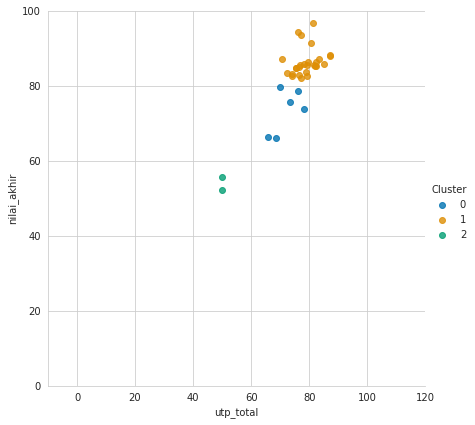

In [150]:
sns.lmplot('utp_total','nilai_akhir',data=data_with_clusters, hue = 'Cluster',
           palette='colorblind',size=6,aspect=1,fit_reg=False)
plt.xlim(-10,120)
plt.ylim(0,100)

## Elbow Method

In [127]:
kmeans.inertia_

4758.558656969696

In [128]:
wcss = []

cl_num = 11
for i in range(1,cl_num):
    kmeans = KMeans(i)
    kmeans.fit(imputed_data)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)
    print("Iteration-"+ str(i)+" :"+str(wcss_iteration))

Iteration-1 :17300.331265306126
Iteration-2 :8779.983595714284
Iteration-3 :4758.558656969696
Iteration-4 :3080.984211666667
Iteration-5 :1763.8834884920639
Iteration-6 :944.2476591269842
Iteration-7 :666.6020002380952
Iteration-8 :501.16562996031763
Iteration-9 :346.53226329365094
Iteration-10 :282.8264632936508


Text(0, 0.5, 'Within cluster Sum of Squares')

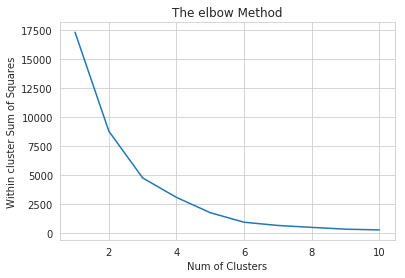

In [129]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title("The elbow Method")
plt.xlabel("Num of Clusters")
plt.ylabel("Within cluster Sum of Squares")